In [1]:
import numpy as np
import matplotlib.pyplot as plt
from core.db_emt_line_core import intplot

In [2]:
%matplotlib widget
plt.ioff()
plt.clf()

### Parámetros en común

In [3]:
R_l_m = 0.0268e-3  # resistencia de la linea Ω/m
X_l_m = 0.2766e-3  # reactancia de la linea Ω/m
L_m = X_l_m/(2*np.pi*50)
C_m = 4.159e-9     # capacidad shunt de la linea F/m

Long = 200.0
N_pos = 200
Δpos = Long/N_pos
L = L_m*Δpos
C = C_m*Δpos
R_l = R_l_m*Δpos
R_s = 200000

C_speed = 1/np.sqrt(L*C) # velocidad de propagación
print(f'Velocidad de propagación = {C_speed/1000:0.1f} km/s')
R_c = np.sqrt(L/C)
print(f'Impedancia = {R_c:0.2f} Ω')

Velocidad de propagación = 16525.5 km/s
Impedancia = 14.55 Ω


### Linea terminada en circuito abierto

In [5]:
intplot('./data/open_circuit_end.npz',step=1)

### Linea terminada en corto circuito

In [6]:
intplot('./data/short_circuit_end.npz',ymin=-100,ymax=100,step=1.0)

### Linea con cambio de impedancia (aumento en la mitad)

In [7]:
intplot('./data/impedance_up.npz',ymin=300,ymax=450,step=1)

### Linea con cambio de impedancia (disminución en la mitad)

In [8]:
intplot('./data/impedance_down.npz',ymin=300,ymax=450,step=1)

### Linea con descargador (50 m)

In [9]:
intplot('./data/surge_arrester_50m.npz',ymin=200,ymax=500,xmax=150,step=1)

### Linea con descargador (5 m)

In [10]:
intplot('./data/surge_arrester_05m.npz',ymin=200,ymax=500,xmax=105,step=1)

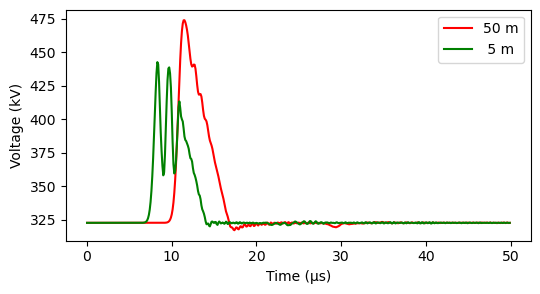

In [12]:
data_50m = np.load('./data/surge_arrester_50m.npz')
data_05m = np.load('./data/surge_arrester_05m.npz')

fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(6, 3), dpi=100)

axes.plot(data_50m['t']*1e6,data_50m['X'][:,300]/1000,'r',label='50 m')
axes.plot(data_05m['t']*1e6,data_05m['X'][:,210]/1000,'g',label=' 5 m')
axes.legend()
axes.set_ylabel('Voltage (kV)')
axes.set_xlabel('Time (µs)')
fig